<a href="https://colab.research.google.com/github/BATTI-CHANDAN-SINGH/Batch_22_-2303A51515-python/blob/main/Lab-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question-01

In [10]:
import pandas as pd

In [11]:
data = {
    "OrderID": [101, 102, 103, 104, 105, 106],
    "Product": ["Laptop", "Phone", "Tablet", "Laptop", "Headphones", "Phone"],
    "Quantity": [2, 5, 3, 1, 10, 4],
    "Price": [60000, 15000, 20000, 60000, 2000, 15000]
}

In [12]:
df = pd.DataFrame(data)
print("=== Original Sales Data ===")
print(df)

=== Original Sales Data ===
   OrderID     Product  Quantity  Price
0      101      Laptop         2  60000
1      102       Phone         5  15000
2      103      Tablet         3  20000
3      104      Laptop         1  60000
4      105  Headphones        10   2000
5      106       Phone         4  15000


In [13]:
df["Total_Sale"] = df["Quantity"] * df["Price"]
print("\n=== Sales Data with Total_Sale ===")
print(df)


=== Sales Data with Total_Sale ===
   OrderID     Product  Quantity  Price  Total_Sale
0      101      Laptop         2  60000      120000
1      102       Phone         5  15000       75000
2      103      Tablet         3  20000       60000
3      104      Laptop         1  60000       60000
4      105  Headphones        10   2000       20000
5      106       Phone         4  15000       60000


In [14]:
filtered_orders = df[df["Total_Sale"] > 1000]
print("\n=== Orders with Total_Sale > 1000 ===")
print(filtered_orders)


=== Orders with Total_Sale > 1000 ===
   OrderID     Product  Quantity  Price  Total_Sale
0      101      Laptop         2  60000      120000
1      102       Phone         5  15000       75000
2      103      Tablet         3  20000       60000
3      104      Laptop         1  60000       60000
4      105  Headphones        10   2000       20000
5      106       Phone         4  15000       60000


In [15]:
most_sold = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False)
print("\n=== Most Sold Product ===")
print(most_sold)


=== Most Sold Product ===
Product
Headphones    10
Phone          9
Laptop         3
Tablet         3
Name: Quantity, dtype: int64


In [16]:
df["Discount"] = df["Total_Sale"].apply(lambda x: 0.10*x if x > 50000 else 0.05*x)
print("\n=== Sales Data with Discount ===")
print(df)


=== Sales Data with Discount ===
   OrderID     Product  Quantity  Price  Total_Sale  Discount
0      101      Laptop         2  60000      120000   12000.0
1      102       Phone         5  15000       75000    7500.0
2      103      Tablet         3  20000       60000    6000.0
3      104      Laptop         1  60000       60000    6000.0
4      105  Headphones        10   2000       20000    1000.0
5      106       Phone         4  15000       60000    6000.0


In [17]:
df.to_excel("sales_summary.xlsx", index=False)
print("\n Sales summary exported to 'sales_summary.xlsx'")


 Sales summary exported to 'sales_summary.xlsx'


Question-02

In [18]:
import matplotlib.pyplot as plt

In [19]:
budget_data = {
    "Department": ["HR", "IT", "Marketing", "Finance", "Operations"],
    "Budget": [50000, 120000, 80000, 60000, 100000]
}
df_budget = pd.DataFrame(budget_data)
print("=== Department Budget ===")
print(df_budget)

=== Department Budget ===
   Department  Budget
0          HR   50000
1          IT  120000
2   Marketing   80000
3     Finance   60000
4  Operations  100000


In [20]:
expenses_data = {
    "Department": ["HR", "IT", "Marketing", "Finance", "Operations"],
    "Actual_Expense": [52000, 150000, 75000, 58000, 110000]
}
df_expenses = pd.DataFrame(expenses_data)
print("\n=== Department Expenses ===")
print(df_expenses)


=== Department Expenses ===
   Department  Actual_Expense
0          HR           52000
1          IT          150000
2   Marketing           75000
3     Finance           58000
4  Operations          110000


In [21]:
df_merged = pd.merge(df_budget, df_expenses, on="Department")
print("\n=== Merged Data ===")
print(df_merged)


=== Merged Data ===
   Department  Budget  Actual_Expense
0          HR   50000           52000
1          IT  120000          150000
2   Marketing   80000           75000
3     Finance   60000           58000
4  Operations  100000          110000


In [22]:
df_merged["Variance"] = df_merged["Actual_Expense"] - df_merged["Budget"]
print("\n=== Data with Variance ===")
print(df_merged)


=== Data with Variance ===
   Department  Budget  Actual_Expense  Variance
0          HR   50000           52000      2000
1          IT  120000          150000     30000
2   Marketing   80000           75000     -5000
3     Finance   60000           58000     -2000
4  Operations  100000          110000     10000


In [23]:
exceeded = df_merged[df_merged["Variance"] > 0]
print("\n=== Departments Exceeding Budget ===")
print(exceeded)


=== Departments Exceeding Budget ===
   Department  Budget  Actual_Expense  Variance
0          HR   50000           52000      2000
1          IT  120000          150000     30000
4  Operations  100000          110000     10000


In [24]:
df_sorted = df_merged.sort_values(by="Variance", ascending=False)
print("\n=== Departments Sorted by Variance ===")
print(df_sorted)


=== Departments Sorted by Variance ===
   Department  Budget  Actual_Expense  Variance
1          IT  120000          150000     30000
4  Operations  100000          110000     10000
0          HR   50000           52000      2000
3     Finance   60000           58000     -2000
2   Marketing   80000           75000     -5000


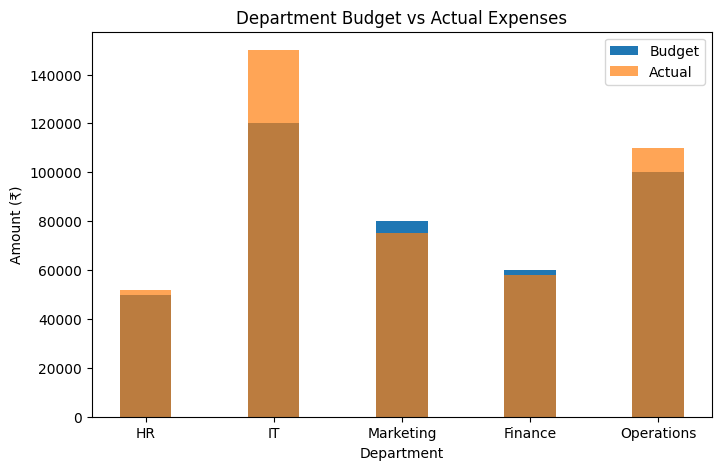

In [25]:
plt.figure(figsize=(8,5))
plt.bar(df_merged["Department"], df_merged["Budget"], width=0.4, label="Budget")
plt.bar(df_merged["Department"], df_merged["Actual_Expense"], width=0.4,
        label="Actual", alpha=0.7)
plt.title("Department Budget vs Actual Expenses")
plt.xlabel("Department")
plt.ylabel("Amount (₹)")
plt.legend()
plt.show()